<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/ai_hw1_regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Сиды фиксируются для того, чтобы результаты были повторяемыми при повторных запусках и сравнении с эталонными результатами.
От ГСЧ зависят, в частности, разбиения данных на обучающую и тестовую выборки.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [73]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

df_train_raw = df_train.copy() # понадобятся для возврата в исходное состояние
df_test_raw = df_test.copy()

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [74]:
df_train.sample(10)
df_test.head(5)
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [75]:
# Посмотрите, есть ли в датасете пропуски
df_train.info()
# пропуски есть

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [76]:
#  Запишите/выведите названия колонок, для которых есть пропущенные значения
cols_null = df_train.columns[df_train.isnull().any()]
print(f"Колонки с пропущенными значениями:")
print(*cols_null, sep=", ")

Колонки с пропущенными значениями:
mileage, engine, max_power, torque, seats


In [77]:
# Посмотрите, есть ли в данных явные дубликаты 
df_train.duplicated().sum()  # есть дубликаты

np.int64(985)

In [78]:
# Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
'''Cчитаю, что за установку ydata-profiling нужно давать больше баллов, т.к.
оно требует numba, которая требует numpy<2.1, а текущая версия уже 2.1.
'''
# TODO: раскомментировать перед сдачей
# profile_report = ProfileReport(df_train, title = "Отчет о тренировочном датасете")
# profile_report.to_file("df_train-report.html")

'Cчитаю, что за установку ydata-profiling нужно давать больше баллов, т.к.\nоно требует numba, которая требует numpy<2.1, а текущая версия уже 2.1.\n'

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

**Замечание**
>Заполнять пропуски медианами на этом этапе рано - сейчас это теккстовые поля не конвертируемые в число без предобработки.  
>Буду это делать после выполнения задания №3, где нужно разобрать эти поля на значение и единицы измерения.

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ] Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [79]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
cols_all = df_train.columns
df_train.duplicated(subset=cols_all.drop('selling_price')).sum()  # 1159 повторных строк, всего 1799 дубликатов (включая "оригинал" = keep=False)

np.int64(1159)

In [80]:
# Отобразите такие объекты (0.15 балла)
df_train[df_train.duplicated(subset=cols_all.drop('selling_price'), keep=False)]

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4 kmpl   
26        25000  Petrol  Individual       Manual   First Owner   16.8 kmpl   
27        70000  Diesel  Individual       Manual   First Owner   24.3 kmpl   
28        50000  Petrol  Individual       Manual  Second Owner         NaN   
29        35000  Petrol  Individual       Manual  Second Owner   14.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
6981      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine  max_power               torque  seats  
22    1197 CC   83.1 bhp       115Nm@ 4000rpm    5.0  
26     796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
27    1248 CC   88.5 bhp       200Nm@ 1750rpm    5.0  
28        NaN        NaN                  NaN    NaN  
29     796 CC     35 bhp      6.1kgm@ 3000rpm    5.0  
...       ...        ...                  ...    ...  
6981  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6984  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 13 columns]

In [81]:
# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
df_train.drop_duplicates(subset=cols_all.drop('selling_price'), keep='first', inplace=True)

In [82]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)
df_train.reset_index(drop=True, inplace=True)

In [83]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

#### Удалим столбец `torque`

In [84]:
df_train.drop('torque', inplace=True, axis=1)
df_test.drop('torque', inplace=True, axis=1)

#### Уберем единицы измерения для признаков `mileage`, `engine`, `max_power`.

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

Определим кастомный трансформер.   
Можно было бы не делать этого, но планирую создать пайплайн предобработки данных, чтобы экспортировать его в FastAPI приложение.

In [86]:
class FirstWordExtractor(BaseEstimator, TransformerMixin):
    '''Трансформер для выделение первого слова и создания нового столбца.
    
    Пример: 
        spltWords = FirstWordExtractor(['name'], ['make'])
        создать столбец 'make' (производитель) из столбца 'name' (название автомобиля)
    '''
    def __init__(self, source_cols: list[str], target_cols=None):
        self.source_cols = source_cols
        self.target_cols = target_cols

        if len(self.source_cols) != len(self.target_cols):
            raise ValueError("Количесвто элементов в 'source_cols' и 'target_cols' не совпадает.")

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for source_col, target_col in zip(self.source_cols, self.target_cols):
            X[target_col] = X[source_col].str.split().str.get(0)
        return X

Применим трансформер.

**Важно**
> Вернемся к колонке `name`.  
> Выделим из нее первое слово и сохраним в новый столбец `make`- название производителя.  
> (есть пара строк "Land Rover" но нам для обучения не важно, что он будет как "Land").

In [87]:
split0 = FirstWordExtractor(
    source_cols=['name', 'mileage', 'engine', 'max_power'], 
    target_cols=['make', 'mileage', 'engine', 'max_power']
)

df_train = split0.fit_transform(df_train)
df_test = split0.transform(df_test)  # тут не принципиально есть ли fit_ - он ничего не делает

# удаляем исходные колонки
df_train.drop('name', axis=1, inplace=True)
df_test.drop('name', axis=1, inplace=True)

#### Приведем тип данных к `float`.

Для этого опишем еще один трансформер.

In [88]:
class FloatConverter(BaseEstimator, TransformerMixin):
    '''Трансформер для преобразования столбцов в числа в пайплайне'''
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
       for col in self.columns:
           try:
               X[col] = X[col].astype(float)
           except ValueError as e:
               print(f"Есть нечисловые значения в {col}: {e}. Заменены на NaN.")
               # после замены на NaN это можно заполнить через Imputer
               X[col] = pd.to_numeric(X[col], errors='coerce')
       return X

Применим трансформер

In [89]:
makeFloat = FloatConverter(['mileage', 'engine', 'max_power', 'seats'])

df_train = makeFloat.fit_transform(df_train)
df_test = makeFloat.transform(df_test)

Есть нечисловые значения в max_power: could not convert string to float: 'bhp'. Заменены на NaN.


#### Теперь избавимся от пропусков

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

Создадим еще один трансформер.

In [90]:
class MedianImputer(BaseEstimator, TransformerMixin):
    '''Трансформер для заполнения медианой в пайплайне'''
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        try:
            self.medians_ = X[self.columns].median().to_dict()
            self.is_fitted_ = True
        except KeyError as e:
            print(f"Не найдены столбцы {e} в датасете.")
        except ValueError as e:
            print(f"Невозможно вычислить медиану для столбца {e}.")
        return self

    def transform(self, X):
        if self.is_fitted_:
           for col in self.columns:
                X[col] = X[col].fillna(self.medians_[col])
        return X

In [91]:
medians = MedianImputer(['mileage', 'engine', 'max_power', 'seats'])

df_train = medians.fit_transform(df_train)
df_test = medians.transform(df_test)

In [92]:
df_train.info()  # видим, что тип данных float и пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   selling_price  5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   float64
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   float64
 11  make           5840 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

Можно было бы выполнить
```python
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
```

Но мы снова сделаем трансформер.

In [93]:
class IntConverter(BaseEstimator, TransformerMixin):
    '''Трансформер для преобразования столбцов в числа в пайплайне'''
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
       for col in self.columns:
           try:
               X[col] = X[col].astype(int)
           except ValueError as e:
               print(f"Есть нечисловые значения в {col}: {e}. Заменены на NaN.")
               # после замены на NaN это можно заполнить медианами через SimpleImputer
               X[col] = pd.to_numeric(X[col], downcast='integer',  errors='coerce')
       return X

In [94]:
makeInt = IntConverter(['engine', 'seats'])

df_train = makeInt.fit_transform(df_train)
df_test = makeInt.transform(df_test)

In [95]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   selling_price  5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   int64  
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   int64  
 11  make           5840 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


**Важно**
> Почти все трансформации, примененные к **тестовым** данным (df_test), в последствии необходимо применять ко входным данным в приложении на FastAPI, т.к. полученные модели будут применяться к новым данным. Именно поэтому я оформлял их как отдельные функции, для последующей сборки в пайплайн.

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

#### Основные статистики по числовым столбцам

In [96]:
# your code here
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [97]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

#### Основные статистики по категориальным столбцам

In [98]:
df_train.describe(include='object')

fuel seller_type transmission        owner    make
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

In [99]:
df_test.describe(include='object')

fuel seller_type transmission        owner    make
count     1000        1000         1000         1000    1000
unique       4           3            2            5      25
top     Diesel  Individual       Manual  First Owner  Maruti
freq       534         837          877          623     290

In [100]:
df_train.shape

(5840, 12)

In [101]:
# Было assert df_train.shape == (5840, 13)
# но мы удалили столбец torque, поэтому 12
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

#### Шаг 1 - pairplot по тренировочным данным

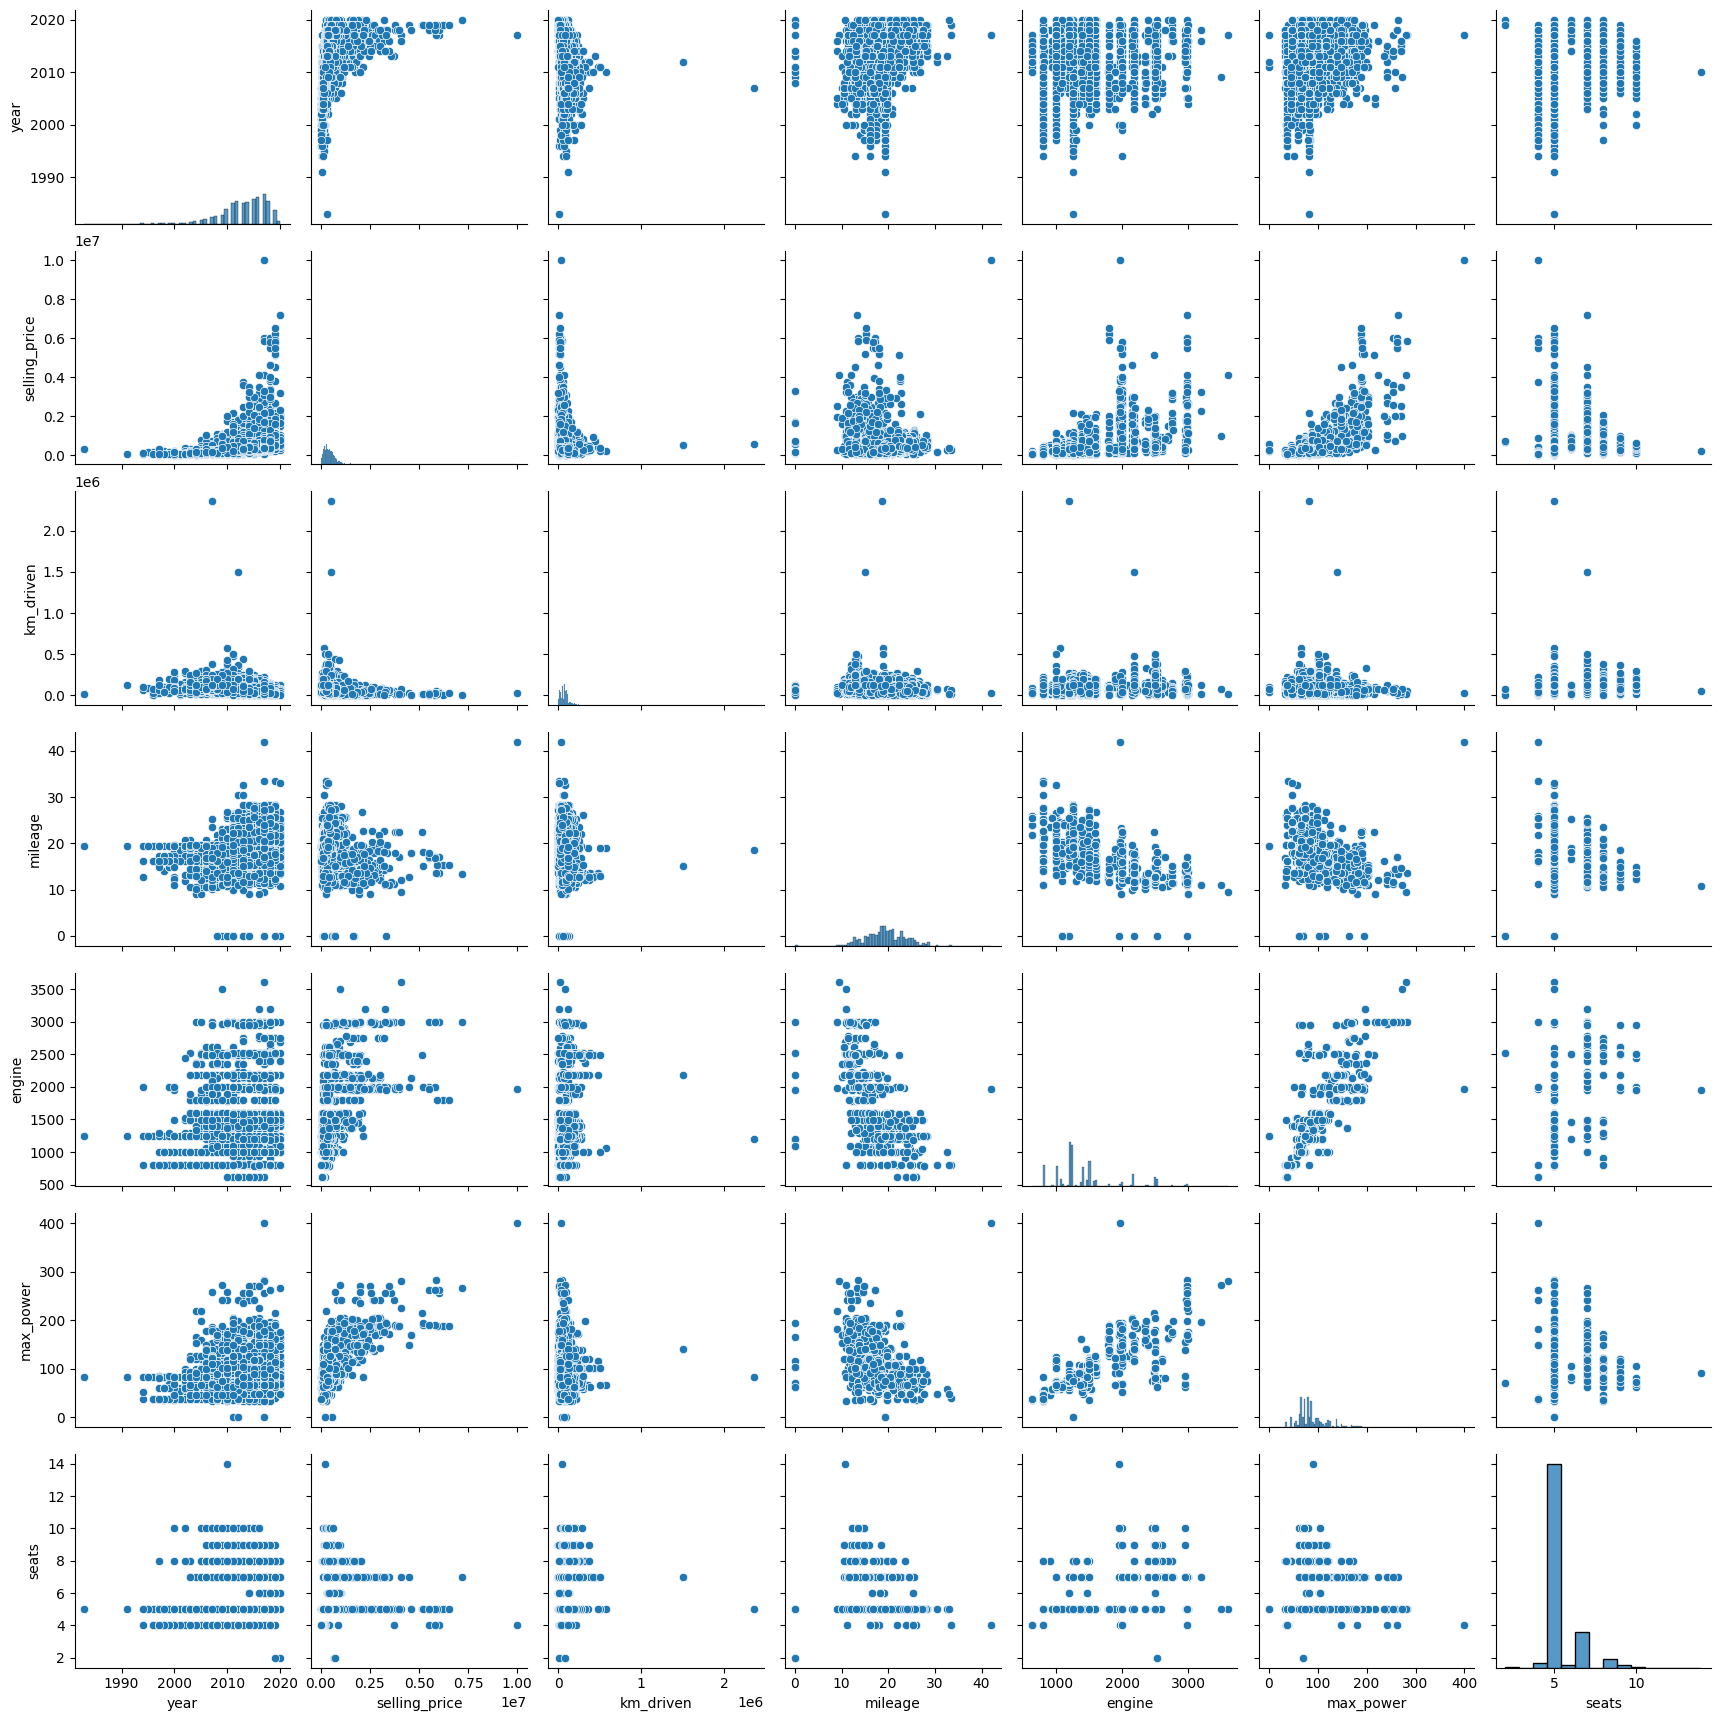

In [102]:
# Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_train.select_dtypes(include='number'))
plt.show()

##### Выводы

На основании графиков можно сделать следующие предположения:
- Значение целевой переменной `selling_price`
  - связано с `year` нелинейно (квадрат? exp?),
  - связано с `km_driven` нелинейно (обратно квадратично, ln?),
  - связано с `engine` линейно,
  - связано с `max_power` линейно.
  - связано с `seats` (обратно линейно?). Чем больше мест - тем меньше цена (видимо минивэны долго эксплуатируются в одних руках и к продаже сильно дешевеют).
- `mileage` коррелирует с
  - `engine` (больше объем - больше расход),
  - `max_power` (больше мощность - больше расход)
  - `seats` (больше мест - больше расход)
  - `year` (современные машины более экономичные)
- `max_power` коррелирует с
  -  `engine` (это очевидно),
  -  `seats` (больше мест - меньше мощность)
- `engine` коррелирует с `seats` (у вместительных машин больше объем двигателя) 
  

#### Шаг 2 - pairplot по тестовым данным

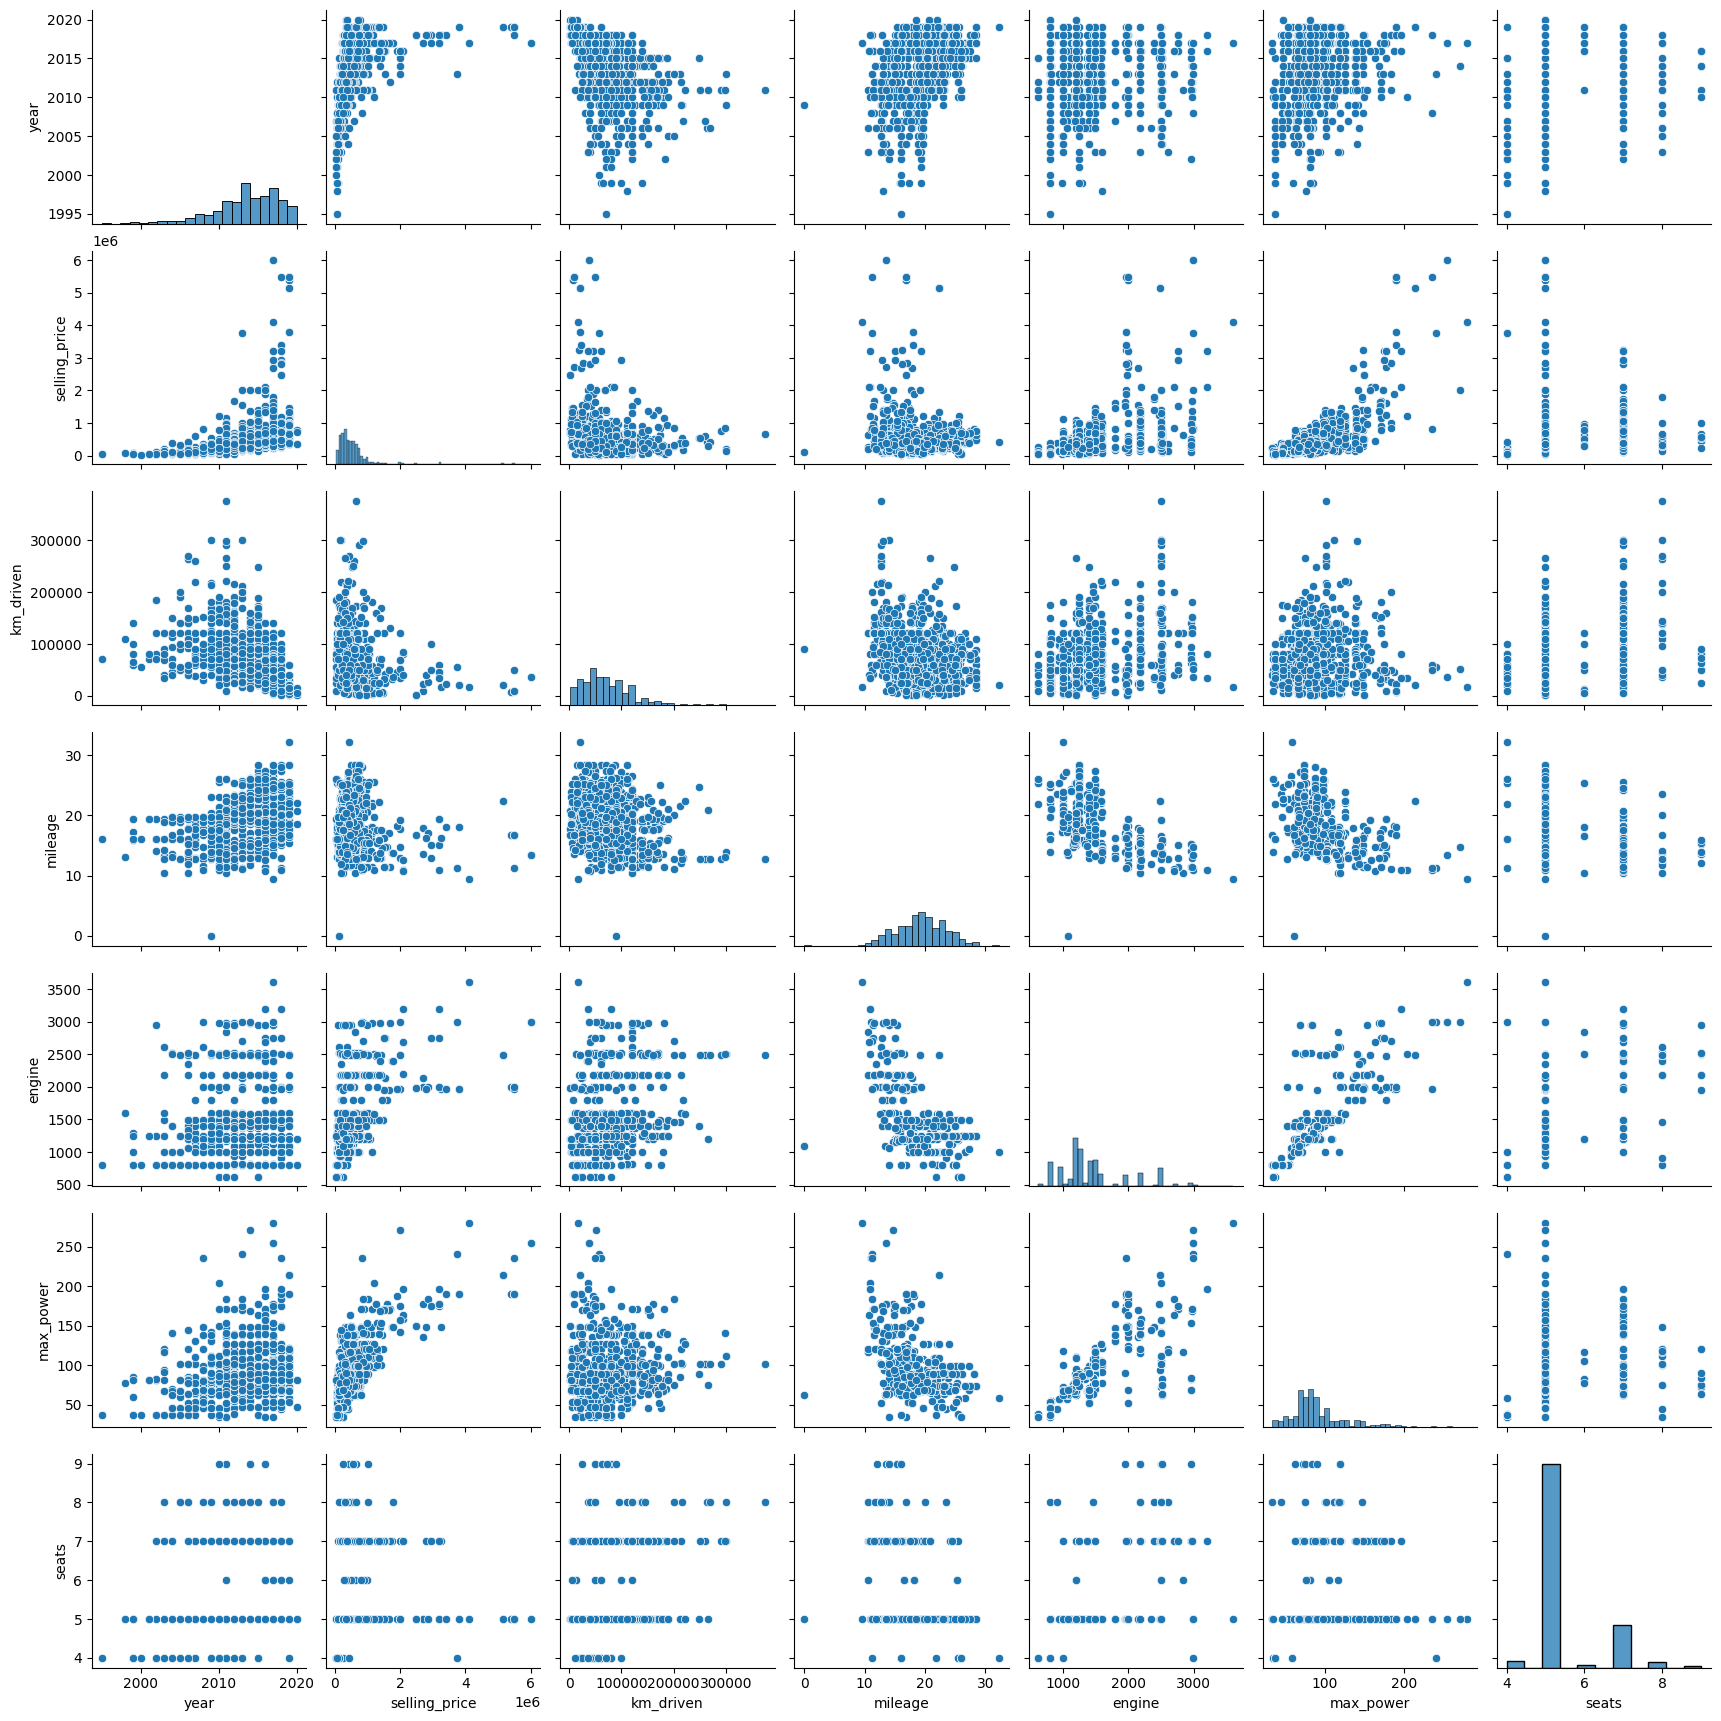

In [104]:
# Постройте pairplot по тестовым данным
sns.pairplot(df_test.select_dtypes(include='number'))
plt.show()

##### Выводы

Тестовые данные выглядят значительно "чище" трейна. Выбросы если и есть, то незначительные (по масштабу).  
В результате - графики более информативные.

По-сути все предположения из Шага 1 остаются в силе.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


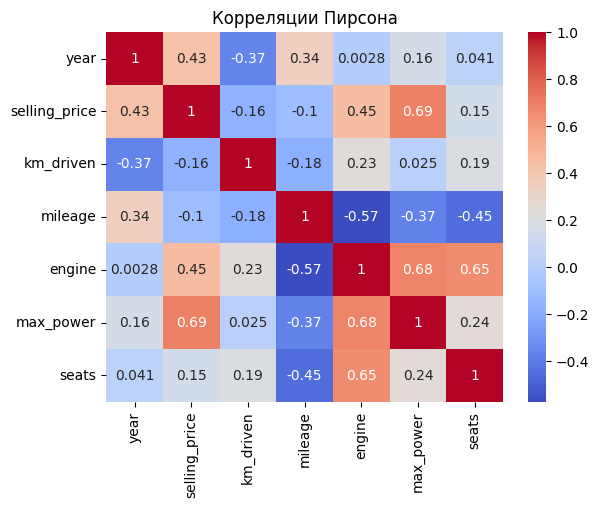

In [105]:
corr_train = df_train.corr(numeric_only=True) # по-умолчанию method='pearson'

sns.heatmap(corr_train, annot=True, cmap='coolwarm')
plt.title('Корреляции Пирсона')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

#### Ответы

- Наименее скоррелированы `engine` и `year`.
- Сильная положительная линейная зависимость наблюдается между `max_power` и `engine` (если не учитывать связи с целевой переменной - там сильная связь `max_power` и `selling_price`).
- Да, опираясь на данные можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи (корреляция $-0.37$ средняя по модулю и отрицательная).

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Text(0, 0.5, 'Объем двигателя')

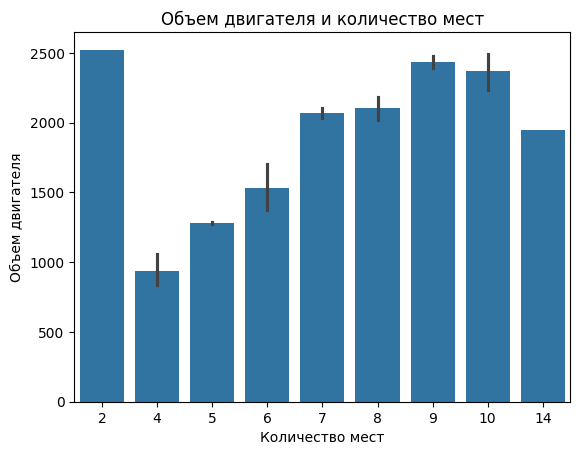

In [106]:
sns.barplot(y='engine', x='seats', data=df_train)
plt.title("Объем двигателя и количество мест")
plt.xlabel("Количество мест")
plt.ylabel("Объем двигателя")

#### Пояснение


Интересная зависимость между объемом двигателя и числом мест.
- самые большой объем двигателя у 2-местных машин.
- самый маленький объем двигателя у 4-местных машин.
- с ростом числа мест объем двигателя растет.

В целом это интутитивно понятно, но вот подтверждение на основе данных.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [107]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include='number').drop(['selling_price'], axis=1)

In [108]:
assert X_train.shape == (5840, 6)

In [109]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include='number').drop(['selling_price'], axis=1)

In [110]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [113]:
'''Несколько полезных функций для вывода значений метрик и весов.
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


def print_R2_MSE(y_test, y_pred):
    '''Выводит на экран R2 и MSE для тестовых и предсказанных данных.
    '''
    print(f'R2: {r2_score(y_test, y_pred):.4f}, MSE: {MSE(y_test, y_pred):.4f}')


def print_weights(cols, weights):
    '''Выводит на печать имена признаков и веса, полученные моделью.
        
    Пример:
    print_model_weights(weights, cols)
    '''

    i_max = np.abs(weights).argmax()
    i_min = np.abs(weights).argmin()
    for i, tup in enumerate(zip(cols, weights)):
        print(f"{tup[0]:10}: {tup[1]:12.4f} {'max_abs' if i == i_max else ''}{'min_abs' if i == i_min else ''}")
        

def print_model_weights(model):
    '''Выводит на экран имена признаков и веса, полученные моделью.
        
    Пример:
    print_model_weights(model1)
    '''

    weights = model.coef_
    cols = model.feature_names_in_
    print_weights(cols, weights)


#### Линейная регрессия с дефолтными параметрами

In [114]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print_R2_MSE(y_test, y_pred1)
print_model_weights(model1)

R2: 0.5941, MSE: 233298779730.4583
year      :   37304.6278 max_abs
km_driven :      -0.7352 min_abs
mileage   :    7234.4679 
engine    :     125.9799 
max_power :   10203.2467 
seats     :  -23628.3023 


In [ ]:
# попытка интерпретации
print(np.sqrt(233298779730.45834))
print(df_train['selling_price'].median())


483010.1238384744
405000.0


#### Выводы

Модель LinearRegression с параметрами по-умолчанию показывает не высокий результат.
- значение $R^2=0.5941$ говорит что модель примерно посередине между "всегда показывать среднее значение целевой переменной" и "всегда правильный ответ".
- Метрика $MSE$ сама плохо интерпретируется. $\sqrt{MSE}=483010$ очень близко к медиане `selling_price`, т.е. отклонения порядка 100% целевой переменной, что кажется очень много.
- большой разброс значений весов - не похоже на переобучение (т.к. $R^2$ на трейн и тест примерно одинаковый), значит влияет масштаб признаков.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [119]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)

print_R2_MSE(y_test, y_pred2)
print_model_weights(model2)

R2: 0.5941, MSE: 233298779730.4496
year      :  152772.5708 
km_driven :  -44158.8185 
mileage   :   28833.9258 
engine    :   61178.4943 
max_power :  322807.3533 max_abs
seats     :  -23209.1325 min_abs


#### Вывод

Масштабирование признаков не повлияло на метрики, но привело веса в сравнымые диапазоны.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [120]:
print_model_weights(model2)

year      :  152772.5708 
km_driven :  -44158.8185 
mileage   :   28833.9258 
engine    :   61178.4943 
max_power :  322807.3533 max_abs
seats     :  -23209.1325 min_abs


In [121]:
i = np.abs(model2.coef_).argmax()
print(f'Наиболее информативен признак `{X_train.columns[i]}` вес={model2.coef_[i]:.4f}')

Наиболее информативен признак `max_power` вес=322807.3533


#### Ответ

Наиболее информативным оказался признак `max_power`, что было ожидаемо по итогам Задания 7.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [122]:
from sklearn.linear_model import Lasso

# your code here
model3 = Lasso()
model3.fit(X_train_scaled, y_train)

y_pred3 = model3.predict(X_test_scaled)
print_R2_MSE(y_test, y_pred3)
print_model_weights(model3)

R2: 0.5941, MSE: 233299450599.1693
year      :  152772.3902 
km_driven :  -44157.6899 
mileage   :   28832.0434 
engine    :   61173.6624 
max_power :  322808.2369 max_abs
seats     :  -23206.2556 min_abs


#### Выводы

- Качество Lasso регрессии практически совпадает с LinearRegression. Качество низкое (R2: 0.5941).  
- С параметрами по-умолчанию веса не зануляются, потому что у LinearRegression веса уже примерно одного порядка.
- кажется, не хватает значимых признаков.

**Примечание**
> При alpha=8150 зануляется вес для `seats`, т.к у него с таргетом почти самая маленькая корреляция, но качество падает (R2=0.5835 против R2=0.594).

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

#### Ваша задача 1


- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [125]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Параметры для перебора по сетке
param_grid = {
    'lasso__alpha': np.linspace(1, 1000, 1000),       # лучшее = 938, R2: 0.5930352985245454, MSE: 233934931544.96625
    # 'lasso__alpha': np.linspace(900, 1000, 10000),    # лучшее = 938, R2: 0.5930352985245454, MSE: 233934931544.96625
    # 'lasso__alpha': np.linspace(8200, 200, 1000),     # лучшее = 938, R2: 0.5930352985245454, MSE: 233934931544.96625
    # 'lasso__alpha': [8150],    # обнуляет вес при `seats` = 0,      R2: 0.5835042477924428, MSE: 239413651671.0175
    'lasso__max_iter': [2000],  # макс. число итераций для Lasso
}

# Настройки для кросс-валидации
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10 фолдов с перемешиванием

# Параметры перебора по сетке: 10 фолдов * 1000 значений = 10000 моделей
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, refit=True, scoring='neg_mean_squared_error',  n_jobs=-1,  verbose=1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   4...
        937.,  938.,  939.,  940.,  941.,  942.,  943.,  944.,  945.,
        946.,  947.,  948.,  949.,  950.,  951.,  952.,  953.,  954.,
        955.,  956.,  957.,  958.,  959.,  960.,  961.,  962.,  963.,
        964.,  965.,  966.,  967.,  968.,  969.,  970.,  971.,  972.,
        973.,  974.,  975.,  976.,  977.,  978.,  979.,  980.,  981.,
        982.,  983.,  984.,  985.,  986.,  987.,  988.,  989.,  990.,
        991.,  992.,  993.,  994.,  995.,  996.,  997.,  998.,  999.,
       1000.]),
                         'lasso__max_iter': [2000]},
             scoring='neg_mean_squared_error', verbose=1)

In [126]:
best_lasso = grid_search.best_estimator_  # лучшая модель
best_alpha_lasso = best_lasso.named_steps['lasso'].alpha  # к-т регуляризации из лучшей модели

print(f"Best alpha - Lasso: {best_alpha_lasso}")

y_pred4 = best_lasso.predict(X_test)  # предсказания лучшей модели

print_R2_MSE(y_test, y_pred4)
print_weights(X_train.columns, best_lasso.named_steps['lasso'].coef_)

Best alpha - Lasso: 938.0
R2: 0.5930, MSE: 233934931544.9662
year      :  152568.5589 
km_driven :  -43121.3613 
mileage   :   27125.3882 
engine    :   56731.1224 
max_power :  323613.4779 max_abs
seats     :  -20529.2469 min_abs


##### Ответы

- Перепробовал много вариантов перебора (до 1млн моделей). Вопрос понятен, прямой ответ `число моделей = число фолдов * число значений для перебора`, и в последнем примере это $10 * 1000 = 10000$ моделей.
- Lasso модель **вообще не улучшила качество** по сравнением с первым вариантом (LinearRegression по-умолчанию)
- У лучшей Lasso модели - `alpha = 938`, `R2: 0.5930`, `MSE: 233934931544.9662` (что хуже первой модели)
- Никакие веса не занулились. Зануление весов начинается при `alpha = 8150`

### Ваша задача 2


- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [127]:
from sklearn.linear_model import ElasticNet

# your code here
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet())
])

# Параметры для перебора по сетке
param_grid2 = {
    'elastic__l1_ratio': np.linspace(0, 1, 10),     # `l1_ratio` от 0 до 1 c шагом 0.1
    'elastic__alpha': np.linspace(1, 1000, 1000),   # `alpha` от 1 до 1000 c шагом 1
    # 'elastic__selection': ['random'],
    'elastic__max_iter': [6000]  # увеличим до 5000, т.к. при 1000 (по-умолчанию) часто не сходится
    # 'elastic__tol': [0.001]  # точность регуляризации elasticnet
}

# Настройки кросс-валидации
kf2 = KFold(n_splits=10, shuffle=True, random_state=42)  # 10 фолдов с перемешиванием

# Поиск лучшей модели по сетке
grid_search2 = GridSearchCV(pipeline2, param_grid2, cv=kf2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search2.fit(X_train, y_train)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.814e+14, tolerance: 1.474e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.887e+14, tolerance: 1.484e+11 Linear regression models with null weight for the l1 regularization term are more ef

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic', ElasticNet())]),
             n_jobs=-1,
             param_grid={'elastic__alpha': array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,...
        964.,  965.,  966.,  967.,  968.,  969.,  970.,  971.,  972.,
        973.,  974.,  975.,  976.,  977.,  978.,  979.,  980.,  981.,
        982.,  983.,  984.,  985.,  986.,  987.,  988.,  989.,  990.,
        991.,  992.,  993.,  994.,  995.,  996.,  997.,  998.,  999.,
       1000.]),
                         'elastic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'elastic__max_iter': [6000]},
             scoring='neg_mean_squared_error', verbose=1)

In [128]:
best_elastic = grid_search2.best_estimator_
best_alpha2 = best_elastic.named_steps['elastic'].alpha

print(f"Best alpha - ElasticNet: {best_alpha2}")

y_pred5 = best_elastic.predict(X_test)

print_R2_MSE(y_test, y_pred5)
print_weights(X_train.columns, best_elastic.named_steps['elastic'].coef_)

Best alpha - ElasticNet: 938.0
R2: 0.5930, MSE: 233934931544.9662
year      :  152568.5589 
km_driven :  -43121.3613 
mileage   :   27125.3882 
engine    :   56731.1224 
max_power :  323613.4779 max_abs
seats     :  -20529.2469 min_abs


In [132]:
# все параметры лучшей модели (смотрим `l1_ratio`)
best_elastic.get_params()['steps']

[('scaler', StandardScaler()),
 ('elastic',
  ElasticNet(alpha=np.float64(938.0), l1_ratio=np.float64(1.0), max_iter=6000))]

#### Ответы

- Число моделей: 10 фолдов * 1000 (alpha) * 10 (l1_ratio) = 100000 моделей.
- У лучшей ElasticNet модели - `alpha: 938`, `l1_ratio: 1`, `R2: 0.5930`, `MSE: 233934931544.9662`
  - модель превратилась в обычную Lasso (!) и повторила результат предыдущего задания.
- Никакие веса не занулились.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

**Обработка столбца `name`**
> В задании 3 я выделил из `name` название производителя (сохранил как `make`)

In [134]:
df_train.head(2)

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   

          owner  mileage  engine  max_power  seats    make  
0   First Owner    23.40    1248      74.00      5  Maruti  
1  Second Owner    21.14    1498     103.52      5   Skoda

In [137]:
# сколько всего уникальных значений в столбце make? - 30
df_train['make'].unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [136]:
df_test['make'].unique()

array(['Mahindra', 'Tata', 'Honda', 'Chevrolet', 'Maruti', 'Hyundai',
       'Lexus', 'Ford', 'Jeep', 'Renault', 'Toyota', 'Skoda', 'BMW',
       'Datsun', 'Volvo', 'Nissan', 'Volkswagen', 'Ambassador', 'Jaguar',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Opel', 'Fiat', 'Ashok'],
      dtype=object)

In [135]:
set_make_train = set(df_train['make'].unique().tolist())
set_make_test = set(df_test['make'].unique().tolist())

print(set_make_test - set_make_train)

{'Ashok', 'Opel'}


В тестовых данных есть значения, не встречающиеся в обучающих.


Далее - добавим категориальные признаки `make`, `fuel`, `seller_type`, `transmission`, `owner` в рабочие датафреймы

In [138]:
X_train_cat = pd.concat([X_train, df_train[['make', 'fuel', 'seller_type', 'transmission', 'owner']]], axis=1)
X_test_cat = pd.concat([X_test, df_test[['make', 'fuel', 'seller_type', 'transmission', 'owner']]], axis=1)

**Важно**
Поскольку я добавил столбец `make`, то исправил следующий assert на 11 столбцов

In [139]:
assert X_train_cat.shape == (5840, 11)  

In [140]:
X_train_cat.describe(include='object')

make    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [141]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_cols = ['seats', 'make', 'fuel', 'seller_type', 'transmission', 'owner']

ohe_task15 = OneHotEncoder(drop='first', handle_unknown='ignore', dtype=np.int8, sparse_output=False) 
ohe_task15.fit(X_train_cat[cat_cols]) 

X_train_cat_ohe = pd.DataFrame(
    ohe_task15.transform(X_train_cat[ohe_task15.feature_names_in_]),
    columns=ohe_task15.get_feature_names_out(),
    index=X_train_cat.index
)
X_test_cat_ohe = pd.DataFrame(
    ohe_task15.transform(X_test_cat[ohe_task15.feature_names_in_]),
    columns=ohe_task15.get_feature_names_out(),
    index=X_test_cat.index
)

X_train_cat_ohe = pd.concat([X_train_cat,  X_train_cat_ohe], axis=1).drop(ohe_task15.feature_names_in_, axis=1)
X_test_cat_ohe = pd.concat([X_test_cat,  X_test_cat_ohe], axis=1).drop(ohe_task15.feature_names_in_, axis=1)

/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [143]:
X_train_cat_ohe.describe()

year     km_driven      mileage       engine    max_power  \
count  5840.000000  5.840000e+03  5840.000000  5840.000000  5840.000000   
mean   2013.428425  7.395224e+04    19.430841  1429.448973    87.906371   
std       4.095622  6.007114e+04     3.985973   485.662834    31.640418   
min    1983.000000  1.000000e+00     0.000000   624.000000     0.000000   
25%    2011.000000  3.900000e+04    16.950000  1197.000000    68.000000   
50%    2014.000000  7.000000e+04    19.370000  1248.000000    81.860000   
75%    2017.000000  1.000000e+05    22.300000  1498.000000    99.000000   
max    2020.000000  2.360457e+06    42.000000  3604.000000   400.000000   

           seats_4      seats_5      seats_6      seats_7      seats_8  ...  \
count  5840.000000  5840.000000  5840.000000  5840.000000  5840.000000  ...   
mean      0.016096     0.790753     0.008219     0.136986     0.032705  ...   
std       0.125855     0.406806     0.090294     0.343862     0.177880  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       fuel_Diesel     fuel_LPG  fuel_Petrol  seller_type_Individual  \
count  5840.000000  5840.000000  5840.000000             5840.000000   
mean      0.544007     0.005822     0.441610                0.894349   
std       0.498102     0.076086     0.496621                0.307416   
min       0.000000     0.000000     0.000000                0.000000   
25%       0.000000     0.000000     0.000000                1.000000   
50%       1.000000     0.000000     0.000000                1.000000   
75%       1.000000     0.000000     1.000000                1.000000   
max       1.000000     1.000000     1.000000                1.000000   

       seller_type_Trustmark Dealer  transmission_Manual  \
count                   5840.000000          5840.000000   
mean                       0.004281             0.913699   
std                        0.065293             0.280833   
min                        0.000000             0.000000   
25%                        0.000000             1.000000   
50%                        0.000000             1.000000   
75%                        0.000000             1.000000   
max                        1.000000             1.000000   

       owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
count                 5840.000000         5840.000000           5840.000000   
mean                     0.023973            0.280651              0.000685   
std                      0.152977            0.449356              0.026164   
min                      0.000000            0.000000              0.000000   
25%                      0.000000            0.000000              0.000000   
50%                      0.000000            0.000000              0.000000   
75%                      0.000000            1.000000              0.000000   
max                      1.000000            1.000000              1.000000   

       owner_Third Owner  
count        5840.000000  
mean            0.077740  
std             0.267785  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 52 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [144]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


pipe_Ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Параметры для перебора по сетке
param_ridge = {
    # 'ridge__alpha': np.logspace(-3, 3, 10000),     # от 0.001 до 1e3. Best alpha: 0.001, R2: 0.7846395365683999, MSE: 123795344136.01268
    # 'ridge__alpha': np.logspace(-2, 1, 1000),      # от 0.01 до 1e3. Best alpha:   0.01, R2: 0.7846423882014331, MSE: 123793704935.91505
    # 'ridge__alpha': np.logspace(-1, 1, 1000),      # от 1e-3 до 1e3. Best alpha:    0.1, R2: 0.7846695307188665, MSE: 123778102641.8224
    # 'ridge__alpha': np.logspace(0, 1, 100),        # от 1  до 10. Best alpha:       1.0, R2: 0.7848442754272655, MSE: 123677654393.48792
    'ridge__alpha': np.linspace(1, 100, 1000),          # от 1  до 10. Best alpha:       1.0, R2: 0.7848442754272655, MSE: 123677654393.48792
    'ridge__max_iter': [2000]  # 
}

# Настройки кросс-валидации
kf3 = KFold(n_splits=10, shuffle=True, random_state=42)  # 10 фолдов с перемешиванием

# Поиск лучшей модели по сетке
grid_search3 = GridSearchCV(pipe_Ridge, param_ridge, cv=kf3, scoring='r2', n_jobs=-1, verbose=2)
grid_search3.fit(X_train_cat_ohe, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[CV] END .............ridge__alpha=1.0, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END .............ridge__alpha=1.0, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END .............ridge__alpha=1.0, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.0990990990990992, ridge__max_iter=2000; total time=   0.0s
[CV] END ridge__alpha=1.09

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([  1.        ,   1.0990991 ,   1.1981982 ,   1.2972973 ,
         1.3963964 ,   1.4954955 ,   1.59459459,   1.69369369,
         1.79279279,   1.89189189,   1.99099099,   2.09009009,
         2.18918919,   2.28828829,   2.38738739,   2.48648649,
         2.585...
        97.32432432,  97.42342342,  97.52252252,  97.62162162,
        97.72072072,  97.81981982,  97.91891892,  98.01801802,
        98.11711712,  98.21621622,  98.31531532,  98.41441441,
        98.51351351,  98.61261261,  98.71171171,  98.81081081,
        98.90990991,  99.00900901,  99.10810811,  99.20720721,
        99.30630631,  99.40540541,  99.5045045 ,  99.6036036 ,
        99.7027027 ,  99.8018018 ,  99.9009009 , 100.        ]),
                         'ridge__max_iter': [2000]},
             scoring='r2', verbose=2)

In [145]:
best_ridge = grid_search3.best_estimator_
best_alpha3 = best_ridge.named_steps['ridge'].alpha

print(f"Ridge. Best alpha: {best_alpha3}")

y_pred6 = best_ridge.predict(X_test_cat_ohe)

print_R2_MSE(y_test, y_pred6)
print_weights(grid_search3.feature_names_in_, best_ridge.named_steps['ridge'].coef_)

Ridge. Best alpha: 1.0
R2: 0.7848, MSE: 123677654393.4879
year      :  165078.9307 
km_driven :  -29469.3774 
mileage   :   14006.7002 
engine    :   30721.4767 
max_power :  193861.9010 max_abs
seats_4   :   45433.5532 
seats_5   :  -29595.0537 
seats_6   :  -11033.3170 
seats_7   :    4618.2672 
seats_8   :  -10178.5759 
seats_9   :      24.6258 min_abs
seats_10  :    2997.4147 
seats_14  :   -1415.6541 
make_Audi :   33308.8570 
make_BMW  :   92969.3691 
make_Chevrolet:  -80011.7995 
make_Daewoo:    1850.7896 
make_Datsun:  -44574.4762 
make_Fiat :  -34804.9079 
make_Force:  -10481.8331 
make_Ford :  -84011.3312 
make_Honda:  -85515.0235 
make_Hyundai: -133614.4089 
make_Isuzu:    3554.3180 
make_Jaguar:   29265.2403 
make_Jeep :   12352.0101 
make_Kia  :     386.0304 
make_Land :   28689.3790 
make_Lexus:   40928.6353 
make_MG   :    6582.5899 
make_Mahindra: -118279.0372 
make_Maruti: -139839.5281 
make_Mercedes-Benz:   61901.3057 
make_Mitsubishi:   -3345.6782 
make_Nissan:  -393

#### Ответ

- Обучилось 10000 моделей
- Лучшие параметры - `alpha: 1.0`, `R2: 0.7848`, `MSE: 123677654393.4879`
- качество существенно выросло

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [146]:
def business_metric(y_true, y_pred):
    # your code here
    return sum((abs(y_pred - y_true)/y_true) < 0.1)/len(y_true)


print(f"LinearRegression 'business_metric':           {business_metric(y_test, y_pred1):>2.4f}")
print(f"Scaled LinearRegression 'business_metric':    {business_metric(y_test, y_pred2):>2.4f}")
print(f"Lasso 'business_metric':                      {business_metric(y_test, y_pred3):>2.4f}")
print(f"Lasso w/ CV 'business_metric':                {business_metric(y_test, y_pred4):>2.4f}")
print(f"ElasticNet w/ CV 'business_metric':           {business_metric(y_test, y_pred5):>2.4f}")
print(f"Ridge (num+category) w/ CV 'business_metric': {business_metric(y_test, y_pred6):>2.4f}")

LinearRegression 'business_metric':           0.2270
Scaled LinearRegression 'business_metric':    0.2270
Lasso 'business_metric':                      0.2270
Lasso w/ CV 'business_metric':                0.2260
ElasticNet w/ CV 'business_metric':           0.2260
Ridge (num+category) w/ CV 'business_metric': 0.3230


#### Ответ

Последняя модель (Ridge с категориальными признаками) лучше всех решает бизнес-задачу "прогнозирование стоимости автомобиля"

In [147]:
import pickle

# сохраним весь пайплайн pipe_Ridge в pickle
pickle.dump(ohe_task15, open('ohe_task15.pkl', 'wb'))
pickle.dump(pipe_Ridge, open('pipe_Ridge.pkl', 'wb'))
pickle.dump(best_ridge, open('best_ridge.pkl', 'wb'))

In [ ]:
df_test_raw = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

**Ответ**

Последняя модель лучше всех решает бизнес-задачу "прогнозирование стоимости автомобиля"

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

